### Step 1: Install Dependencies

In [65]:
%%capture --no-stderr
!pip install -qU langchain langchain-google-genai langgraph

### Step 2: Retrieve API Key

In [13]:
from google.colab import userdata
GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')

### Step 3: Initialize Language Model

In [14]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm: ChatGoogleGenerativeAI = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=GEMINI_API_KEY)

### Step 5: Define TypedDict Classes and User Validation Function

In [45]:
from typing import List
from typing_extensions import TypedDict

class Address(TypedDict):
    street: str
    city: str
    state: str

class User(TypedDict):
    user_id: int
    name: str

# Function to validate user
def validate_user(user: List[User], addresses: List[Address]) -> bool:
    """Validate user using historical addresses.

    Args:
        user: List[User].
        addresses: List[Address].
    """
    return True


### Step 6: Bind Tools to LLM

In [46]:
llm_with_tools = llm.bind_tools([validate_user])

### Step 7: Invoke LLM with Tools


In [47]:
from langchain_core.messages import HumanMessage
call = llm_with_tools.invoke(
    [HumanMessage(content=f"Could you validate user Muhammad Saqlain with 12? He lives at "
    "St No. 2 in Kasur, Punjab")])
print(call)

{'name': 'validate_user', 'description': 'Validate user using historical addresses.\n\n    Args:\n        user: List[User].\n        addresses: List[Address].', 'parameters': {'type_': 6, 'description': 'Validate user using historical addresses.\n\nArgs:\n    user: List[User].\n    addresses: List[Address].', 'properties': {'user': {'type_': 5, 'items': {'type_': 6, 'properties': {'user_id': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['user_id', 'name'], 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'addresses': {'type_': 5, '

### Step 8: Define State and LLM Node Function

In [57]:
from typing_extensions import TypedDict
class llm_with_tools_State(TypedDict):
    messages: list

def llm_node(state: llm_with_tools_State):
    messages = state["messages"]
    call_response = llm_with_tools.invoke(messages)
    messages.append(call_response)
    return {"messages": messages}
    # return {"messages": [call_response]}

### Step 9: Build State Graph

In [60]:
from langgraph.graph import StateGraph, START, END

builder: StateGraph = StateGraph(llm_with_tools_State)

# define nodes
builder.add_node("node_1", llm_node)

# define edges
builder.add_edge(START, "node_1")
builder.add_edge("node_1", END)

# build the graph
graph = builder.compile()

### Step 10: Display State Graph Diagram

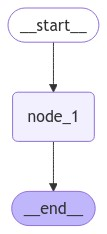

In [61]:
from IPython.display import display, Image
display(Image(graph.get_graph().draw_mermaid_png()))

In [62]:
graph.invoke({"messages": [HumanMessage(content="Hello")]})

{'name': 'validate_user', 'description': 'Validate user using historical addresses.\n\n    Args:\n        user: List[User].\n        addresses: List[Address].', 'parameters': {'type_': 6, 'description': 'Validate user using historical addresses.\n\nArgs:\n    user: List[User].\n    addresses: List[Address].', 'properties': {'user': {'type_': 5, 'items': {'type_': 6, 'properties': {'user_id': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['user_id', 'name'], 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'addresses': {'type_': 5, '

{'messages': [HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello! How can I help you today? \n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-5b70e503-0170-43e6-97b1-135d73347eb7-0', usage_metadata={'input_tokens': 191, 'output_tokens': 9, 'total_tokens': 200})]}

### Step 11: Invoke Graph with User Addition Request

In [63]:
graph.invoke({"messages": [HumanMessage(content="Add Ali Raza user with 123. His address is St No. 5, Lahore, Punjab?")]})

{'name': 'validate_user', 'description': 'Validate user using historical addresses.\n\n    Args:\n        user: List[User].\n        addresses: List[Address].', 'parameters': {'type_': 6, 'description': 'Validate user using historical addresses.\n\nArgs:\n    user: List[User].\n    addresses: List[Address].', 'properties': {'user': {'type_': 5, 'items': {'type_': 6, 'properties': {'user_id': {'type_': 3, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'name': {'type_': 1, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}}, 'required': ['user_id', 'name'], 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0'}, 'format_': '', 'description': '', 'nullable': False, 'enum': [], 'max_items': '0', 'min_items': '0', 'properties': {}, 'required': []}, 'addresses': {'type_': 5, '

{'messages': [HumanMessage(content='Add Ali Raza user with 123. His address is St No. 5, Lahore, Punjab?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'validate_user', 'arguments': '{"user": [{"name": "Ali Raza", "user_id": 123.0}], "addresses": [{"street": "St No. 5", "city": "Lahore", "state": "Punjab"}]}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-8d8e5dec-9a45-405a-80c4-033f2237414d-0', tool_calls=[{'name': 'validate_user', 'args': {'user': [{'name': 'Ali 